In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
filename = "../data/weekly_data.csv"
df = pd.read_csv(filename)
df.head()

,Symbol,High,Low,Open Price,Close Price,Average Trading Price,52 Week Low,52 Week High
0,RELIANCE,2537.7,2326.00,2377.00,2498.15,2442.45,2180.0,2856.15
1,RELIANCE,2755.0,2492.25,2606.75,2536.90,2619.26,2180.0,2856.15
2,RELIANCE,2755.0,2434.60,2589.00,2467.60,2604.60,2180.0,2856.15
3,RELIANCE,2748.0,2427.00,2730.00,2442.65,2556.57,2180.0,2856.15
4,RELIANCE,2660.0,2311.65,2646.00,2337.35,2508.80,2180.0,2856.15


In [3]:
def simple_moving_average(data:pd.DataFrame, ndays:int): 
    """
    Function to find the Simple Moving Average. Since this data is weekly, this variable can be updated on a weekly basis, i.e. 
    the data of each week is used to compute the average
    """
    SMA = pd.Series(data['Close Price'].rolling(ndays).mean(), name = 'SMA') 
    data = data.join(SMA) 
    return data

def expo_weighted_moving_average(data, ndays): 
    """
    Function to find the Simple Moving Average. Since this data is weekly, this variable can be updated on a weekly basis, i.e. 
    the data of each week is used to compute the average
    """
    EMA = pd.Series(data['Close Price'].ewm(span = ndays, min_periods = ndays - 1).mean(), 
                 name = 'EWMA' + str(ndays)) 
    data = data.join(EMA) 
    return data


In [4]:
n = 5
sma = simple_moving_average(df,n)
df = sma

n = 5
ewma = expo_weighted_moving_average(df,n)
df = ewma
df.head() 

,Symbol,High,Low,Open Price,Close Price,Average Trading Price,52 Week Low,52 Week High,SMA,EWMA5
0,RELIANCE,2537.7,2326.00,2377.00,2498.15,2442.45,2180.0,2856.15,2498.15,NaN
1,RELIANCE,2755.0,2492.25,2606.75,2536.90,2619.26,2180.0,2856.15,2536.90,NaN
2,RELIANCE,2755.0,2434.60,2589.00,2467.60,2604.60,2180.0,2856.15,2467.60,NaN
3,RELIANCE,2748.0,2427.00,2730.00,2442.65,2556.57,2180.0,2856.15,2442.65,2473.790000
4,RELIANCE,2660.0,2311.65,2646.00,2337.35,2508.80,2180.0,2856.15,2337.35,2421.412559


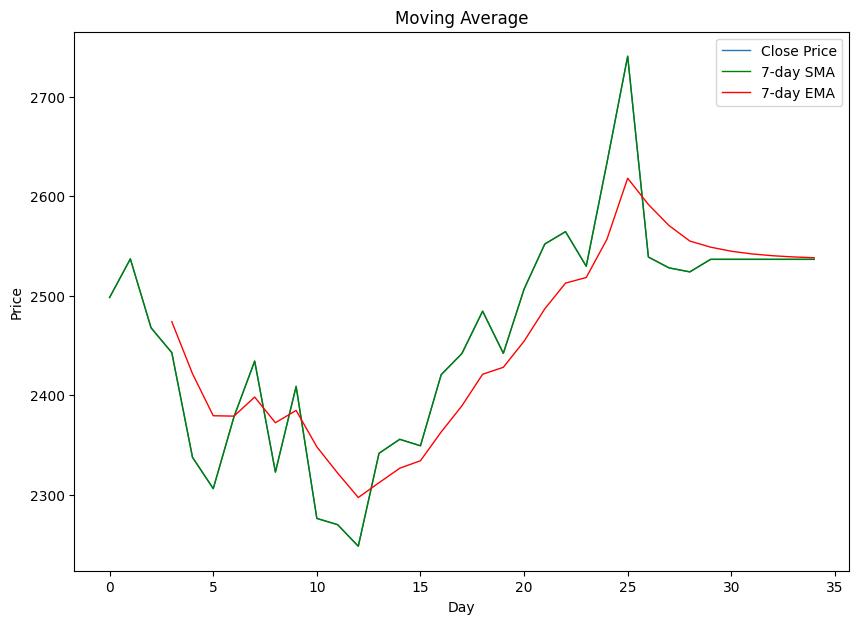

In [5]:
plt.figure(figsize=(10,7))

# Set the title and axis labels
plt.title('Moving Average')
plt.xlabel('Day')
plt.ylabel('Price')

# Plot close price and moving averages
plt.plot(df['Close Price'],lw=1, label='Close Price')
plt.plot(df['SMA'],'g',lw=1, label='7-day SMA')
plt.plot(df['EWMA5'],'r', lw=1, label='7-day EMA')

# Add a legend to the axis
plt.legend()

plt.show()